In [14]:
#importing data
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [13]:
df_DA_Poland = df[(df['job_country'] == 'Poland') & (df['job_title_short'] == 'Data Analyst')]

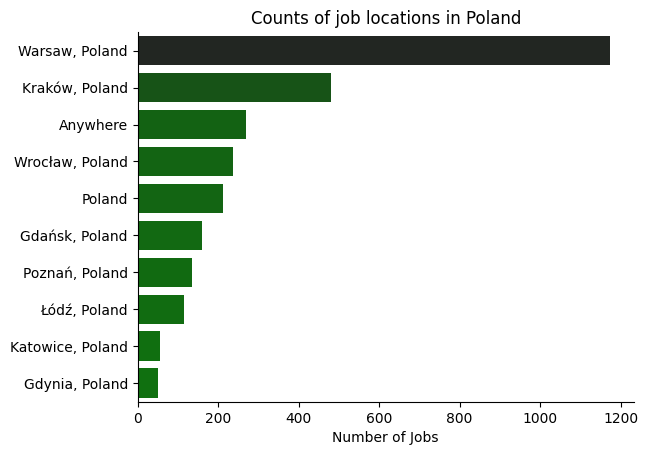

In [19]:
df_plot = df_DA_Poland['job_location'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:g_r', legend=False)
sns.despine()
plt.title('Counts of job locations in Poland')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

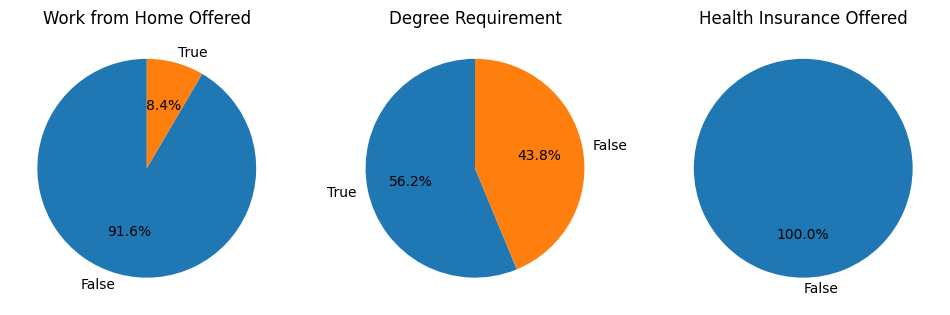

In [24]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_DA_Poland[column].value_counts()
    labels = value_counts.index.astype(str)  
    ax[i].pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()


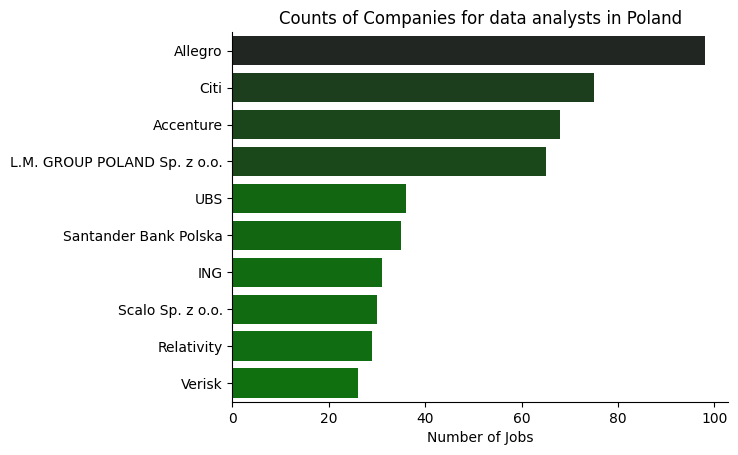

In [26]:
df_plot = df_DA_Poland['company_name'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:g_r', legend=False)
sns.despine()
plt.title('Counts of Companies for data analysts in Poland')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()